In [1]:
# install neccessary module for data analysis and visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\user\\Desktop\\Omdena-Projects\\north-carolina-chapter-bus-drivers\\src\\tasks\\task-1-visualize-bus-riders-data'

In [3]:
os.chdir('../../')

In [4]:
os.listdir()

['.DS_Store',
 'data',
 'docs',
 'README.md',
 'references',
 'results',
 'tasks',
 'visualizations']

In [5]:
os.chdir('./data')

In [6]:
# accessing the bus riders data
bus_riders = pd.read_excel('Winston_Salem_Bus_Riders_imputed.xlsx')

In [7]:
os.chdir('../')

In [8]:
os.getcwd()

'C:\\Users\\user\\Desktop\\Omdena-Projects\\north-carolina-chapter-bus-drivers\\src'

In [9]:
# displays all the columns in the DataFrame
pd.set_option('display.max_columns', None)

In [10]:
print('Bus Riders shape:', bus_riders.shape, end='\n\n')
bus_riders.head()

Bus Riders shape: (215, 110)



,recordid,number_of_jobs,wage_primary_job,hrs_wk_prim_job,hrs_wk_all_jobs,avg_wage_other_jobs,num_buses_get_to_work,mins_last_stop_to_work,mins_bus_home_to_work,mins_bus_work_to_home,hrs_wk_on_bus_to_work,with_car_mins_to_work,on_sunday_use_bus_wrk,on_monday_use_bus_wrk,on_tuesday_use_bus_wrk,on_wednesday_use_bus_wrk,on_thursday_use_bus_wrk,on_friday_use_bus_wrk,on_saturday_use_bus_wrk,dont_use_bus_wrk,night_bus_to_wrk,taxi_get_to_wrk,cost_of_taxi_to_wrk,penalty_late_wrk1,penalty_late_wrk2,penalty_late_wrk3,penalty_late_wrk4,penalty_late_wrk5,chose_job_on_bus_route,trn_dwn_job_not_bus_route,wage_of_turned_dwn_job,lost_job_route_chnge,time_find_new_job,wage_old_vs_new_job,wage_new_vs_old_job,reject_promot_bus_sched,prmote_pay_wage,satisfied_bus_predict,male,birth_year,age,race_caucasion,race_asian,race_nativehawaian,race_othrpacificislander,race_black,race_americanindian,race_hispanic,race_other,zip_code,people_in_hh,hh_autos,valid_drivers_license,have_car,have_truck,have_motorcycle,have_scooter,have_bicycle,have_cellphone,have_smartphone,mins_to_get_to_bus_stop,how_get_to_bus_stop,walk_to_bus_stop,pub_tran_for_work,pub_tran_for_school,pub_tran_for_med_appt,pub_tran_for_leisure_act,pub_tran_for_groceries,pub_tran_for_relig_cong,trans_interf_new_job_opp,trans_interf_promotion,trans_interf_wrk_ontime,trans_interf_medic_att,trans_interf_everday_tasks,trans_interf_school_class,bus_grocer_less_fruit_veg,bus_grocer_less_cans_food,bus_grocer_less_raw_meat,bus_grocer_more_dried_food,bus_grocer_more_snack_food,bus_grocer_more_fast_food,bus_contribute_diet,bus_time_get_to_doctor,vehicle_time_to_doctor,bus_system_finane_goals,rate_pub_tran_system,rate_pub_tran_system_num,wage_of_turned_dwn_job_num,years_used_pub_tran_corr,nonhiswhite,nonhisblack,hispanic,nonhisother,days_a_wk_ride_bus_to_wrk,has_vehicle,employed_full_non_student,employed_part_non_student,employed_and_full_student,less_than_hs_grad,hs_graduate,more_than_hs,education_lvl,bus_no_effect_diet,bus_unhealthy_diet,bus_healthy_diet,hrs_wk_non_prim_jobs,annual_inc,mins_day_home_to_from_work,mins_wk_home_to_from_work,hrs_wk_home_to_from_work
0,1,2,12.0,40,50,10.0,2,10,60,90,6,15,0,1,1,1,1,1,1,0,0,1,6.0,1,0,1,0,0,1,1,15,0,NaN,NaN,NaN,0,NaN,6,1,1966,52,0,0,0,0,1,0,0,0,27106,4,0,0,0,0,0,0,0,1,1.0,10,Walk,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,Less,NaN,NaN,10,Fair,2,15.0,15,0,1,0,0,6,0,1,0,0,0,0,1,7,0,1,0,10,30160.0,150,900,15.000000
1,2,1,9.0,33,33,NaN,2,5,90,90,6,20,1,1,1,1,1,1,1,0,1,1,17.0,0,1,0,0,0,1,1,13,1,180.0,8.5,9.0,1,10.5,5,0,1995,23,0,0,0,0,1,0,0,0,27105,2,1,0,1,0,0,0,0,1,1.0,5,Get dropped of,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0 difference,30.0,10.0,1,Fair,2,13.0,5,0,1,0,0,7,1,1,0,0,0,0,1,6,1,0,0,0,15444.0,180,1260,21.000000
2,3,1,8.0,39,39,NaN,1,10,90,5,10,2,0,1,1,1,1,1,0,0,0,1,10.0,0,0,1,0,0,1,1,9.5,0,NaN,NaN,NaN,0,NaN,7,1,1986,32,0,0,0,1,1,1,0,0,27105,4,1,1,1,0,0,0,0,1,1.0,10,Walk,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0 difference,NaN,NaN,6,Fair,2,9.5,3,0,0,0,1,5,1,0,0,1,0,0,1,7,1,0,0,0,16224.0,95,475,7.916667
3,6,1,9.0,8,8,NaN,1,5,15,15,7,5,1,1,1,1,1,1,1,0,0,1,4.5,0,0,0,0,1,1,1,11,0,NaN,NaN,NaN,0,NaN,5,0,1961,57,0,0,0,0,1,0,0,0,27101,2,0,0,0,0,0,0,0,1,1.0,15,Walk,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0 difference,30.0,15.0,7,Excellent,4,11.0,57,0,1,0,0,7,0,1,0,0,0,0,1,6,1,0,0,0,3744.0,30,210,3.500000
4,8,1,10.5,35,35,NaN,2,15,60,60,6,15,0,1,1,1,1,1,0,0,0,1,12.0,0,0,0,0,1,1,0,NaN,0,NaN,NaN,NaN,0,NaN,7,1,1968,50,0,0,0,0,1,1,0,0,27105,8,3,0,1,0,0,0,0,0,NaN,3,Walk,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,More,NaN,NaN,10,Fair,2,0.0,5,0,0,0,1,5,1,1,0,0,0,1,0,5,0,0,1,0,19110.0,120,600,10.000000


The bus riders dataset has 215 observation or records and 110 variable named columns.

In [11]:
def percent_missing(dataframe, threshold):
    """
    Display the percentage of missing values.
    
    Parameters
    ----------
    dataframe : DataFrame
    threshold : float
        The proportion missing data from 0 to 1.
    """
    missing = dataframe.isnull().sum() * 100/dataframe.shape[0]
    output = missing[missing > threshold].map(lambda x: '{:.2f}%'.format(x))
    return output

In [12]:
os.path.join(os.getcwd(), 'visualizations','graphics','matrix.png')

'C:\\Users\\user\\Desktop\\Omdena-Projects\\north-carolina-chapter-bus-drivers\\src\\visualizations\\graphics\\matrix.png'

In [13]:
def save_plot(img_name):
    """
    Saves a high resolution image of the plot in local working directory
    
    Parameters
    ----------
    img_name : str
        A string representing the name of the plot image saved.
    """
    img_path = os.path.join(os.getcwd(), 'visualizations','graphics',img_name)
    plt.savefig(img_path, dpi=300, bbox_inches='tight')
    

In [14]:
percent_missing(bus_riders, 50)

avg_wage_other_jobs       84.19%
wage_of_turned_dwn_job    50.70%
time_find_new_job         79.53%
wage_old_vs_new_job       79.53%
wage_new_vs_old_job       79.53%
prmote_pay_wage           86.51%
dtype: object

<AxesSubplot:>

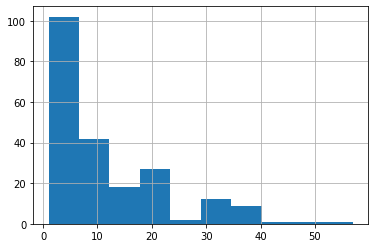

In [15]:
bus_riders['years_used_pub_tran_corr'].hist()

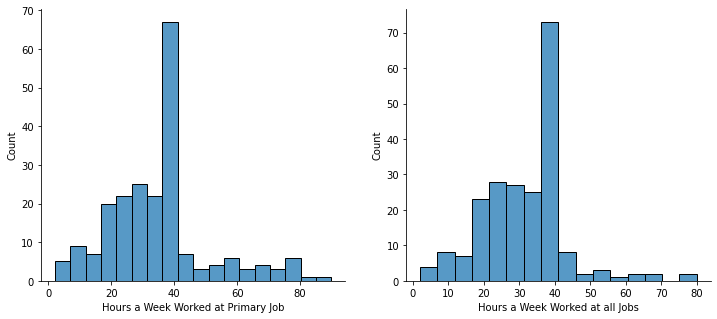

In [16]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
fig, ax = plt.subplots(figsize=[12, 5], nrows=1, ncols=2)


p = sns.histplot(data=bus_riders, x='hrs_wk_all_jobs', ax=ax[0])
p.set_xlabel('Hours a Week Worked at Primary Job')

d = sns.histplot(data=bus_riders, x='hrs_wk_prim_job', ax=ax[1])
d.set_xlabel('Hours a Week Worked at all Jobs');

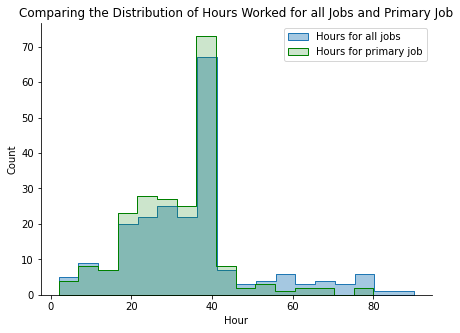

In [17]:
plt.figure(figsize=[7, 5])
sns.histplot(data=bus_riders, x='hrs_wk_all_jobs', element='step', alpha=0.4, label='Hours for all jobs')
sns.histplot(data=bus_riders, x='hrs_wk_prim_job', element='step', alpha=0.2, 
             color='g', label='Hours for primary job')
plt.legend()
plt.xlabel('Hour')
plt.title('Comparing the Distribution of Hours Worked for all Jobs and Primary Job');
save_plot('Comparing hours worked for all jobs and primary job')

I tried to compare the differece betweent the minimum and maximum work hours of `hrs_wk_all_jobs` and `hrs_wk_prim_job`

In [18]:
bus_riders[['hrs_wk_all_jobs', 'hrs_wk_prim_job']].agg(['min', 'max'])

,hrs_wk_all_jobs,hrs_wk_prim_job
min,2,2
max,90,80


The difference between the Hours a week at primary job and Hours a week worked at all jobs is just 10 hours, with the max been 90 hours for all jobs working hours , and 80 hours a week for primary job.

In [19]:
bus_riders['number_of_jobs'].value_counts()

1    181
2     34
Name: number_of_jobs, dtype: int64

Majority of the bus riders had only 1 job while the rest had 2 jobs.

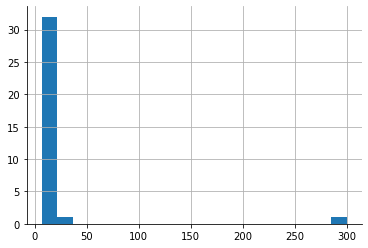

In [20]:
bus_riders['avg_wage_other_jobs'].hist(bins=20);

In [21]:
bus_riders['avg_wage_other_jobs'].describe()

count     34.000000
mean      18.740000
std       49.862931
min        7.000000
25%        8.000000
50%        9.000000
75%       10.750000
max      300.000000
Name: avg_wage_other_jobs, dtype: float64

Amoung the 34 bus riders that had two jobs the `avgerage_wage_other_jobs` (average wage of other jobs) had a **mean** of **18.74$** and a median of **9\$**.
#### $$ Mean =  \frac {\sum_{i=1}^{n} v_i}{n}$$ 
$$ where \ v_{i(max)} = 300\$ $$

As we can see in the histogram above the distribution is skewed to the right. Therefore, a better representation of this small sample would be the median of the 34 bus riders who have other jobs.

In [22]:
bus_riders['avg_wage_other_jobs'].median()

9.0

The median or a better representation of the average wage of other jobs is **9$**

### Did bus riders with more than one job make more annual income than those with a single job?

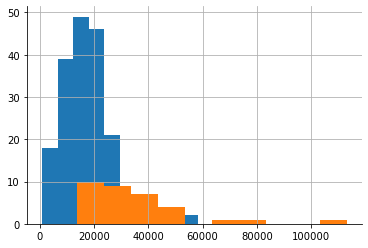

In [23]:
bus_riders.groupby('number_of_jobs')['annual_inc'].hist();

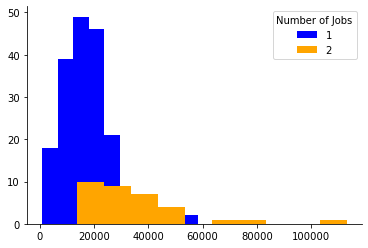

In [24]:
cat_num_jobs = [1, 2]
color = ['blue', 'orange']
for cat, color in zip(cat_num_jobs, color):
    new_frame = bus_riders[bus_riders['number_of_jobs'] == cat]
    plt.hist(data=new_frame, x='annual_inc', color=color, label=str(cat))
    plt.legend(title='Number of Jobs')

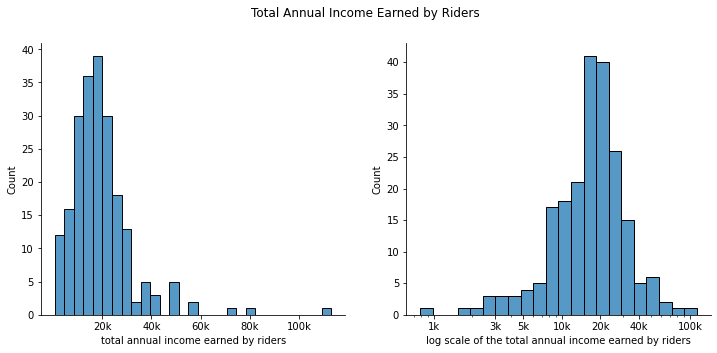

In [25]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
fig, ax = plt.subplots(figsize=[12, 5], nrows=1, ncols=2)


p = sns.histplot(data=bus_riders, x='annual_inc', ax=ax[0])
p.set_xlabel('total annual income earned by riders')
p.set_xticks([20000, 40000, 60000, 80000, 100000])
p.set_xticklabels(['20k', '40k', '60k', '80k', '100k'])

d = sns.histplot(data=bus_riders, x='annual_inc',log_scale=True, ax=ax[1])
d.set_xlabel('log scale of the total annual income earned by riders')
plt.xticks([1000,3000, 5000, 10000, 20000, 40000, 100000], ['1k','3k','5k', '10k', '20k', '40k', '100k'])

plt.suptitle('Total Annual Income Earned by Riders');

<AxesSubplot:xlabel='age', ylabel='Count'>

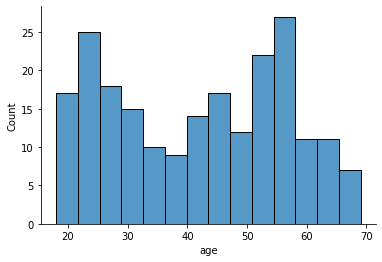

In [26]:
sns.histplot(data=bus_riders, x='age', bins=14)

In [27]:
bus_riders.corr()

,recordid,number_of_jobs,wage_primary_job,hrs_wk_prim_job,hrs_wk_all_jobs,avg_wage_other_jobs,num_buses_get_to_work,mins_last_stop_to_work,mins_bus_home_to_work,mins_bus_work_to_home,hrs_wk_on_bus_to_work,with_car_mins_to_work,on_sunday_use_bus_wrk,on_monday_use_bus_wrk,on_tuesday_use_bus_wrk,on_wednesday_use_bus_wrk,on_thursday_use_bus_wrk,on_friday_use_bus_wrk,on_saturday_use_bus_wrk,dont_use_bus_wrk,night_bus_to_wrk,taxi_get_to_wrk,cost_of_taxi_to_wrk,penalty_late_wrk1,penalty_late_wrk2,penalty_late_wrk3,penalty_late_wrk4,penalty_late_wrk5,chose_job_on_bus_route,trn_dwn_job_not_bus_route,lost_job_route_chnge,time_find_new_job,wage_old_vs_new_job,wage_new_vs_old_job,reject_promot_bus_sched,prmote_pay_wage,satisfied_bus_predict,male,birth_year,age,race_caucasion,race_asian,race_nativehawaian,race_othrpacificislander,race_black,race_americanindian,race_hispanic,race_other,people_in_hh,hh_autos,valid_drivers_license,have_car,have_truck,have_motorcycle,have_scooter,have_bicycle,have_cellphone,have_smartphone,mins_to_get_to_bus_stop,walk_to_bus_stop,pub_tran_for_work,pub_tran_for_school,pub_tran_for_med_appt,pub_tran_for_leisure_act,pub_tran_for_groceries,pub_tran_for_relig_cong,trans_interf_new_job_opp,trans_interf_promotion,trans_interf_wrk_ontime,trans_interf_medic_att,trans_interf_everday_tasks,trans_interf_school_class,bus_grocer_less_fruit_veg,bus_grocer_less_cans_food,bus_grocer_less_raw_meat,bus_grocer_more_dried_food,bus_grocer_more_snack_food,bus_grocer_more_fast_food,bus_time_get_to_doctor,vehicle_time_to_doctor,bus_system_finane_goals,rate_pub_tran_system_num,wage_of_turned_dwn_job_num,years_used_pub_tran_corr,nonhiswhite,nonhisblack,hispanic,nonhisother,days_a_wk_ride_bus_to_wrk,has_vehicle,employed_full_non_student,employed_part_non_student,employed_and_full_student,less_than_hs_grad,hs_graduate,more_than_hs,education_lvl,bus_no_effect_diet,bus_unhealthy_diet,bus_healthy_diet,hrs_wk_non_prim_jobs,annual_inc,mins_day_home_to_from_work,mins_wk_home_to_from_work,hrs_wk_home_to_from_work
recordid,1.000000,-0.080527,0.009700,0.059303,0.007315,0.217646,-0.008447,-0.195870,-0.061576,-0.060026,0.147397,-0.038669,-0.104114,-0.015363,0.034977,0.031911,0.016110,0.033642,-0.112906,-0.110096,0.013198,-0.115341,0.016544,-0.015841,-0.112489,-0.104473,-0.069715,0.072963,-0.146354,-0.169473,-0.169422,0.097055,0.263642,-0.116124,-0.085420,0.464532,-0.013212,-0.090398,-0.005363,0.005363,0.027351,-0.079622,NaN,0.001768,-0.060130,-0.132678,0.072352,0.100019,-0.017887,-0.019741,0.033422,0.006633,-0.013980,NaN,0.000496,-0.061961,0.203886,-0.044985,-0.130659,0.009521,NaN,-0.190022,-0.062438,-0.033528,-0.057347,-0.212290,-0.064809,-0.115955,0.099149,-0.163839,-0.201852,-0.141523,0.043447,0.023817,0.006259,0.063899,0.096264,0.025715,0.092381,-0.092395,0.007739,-0.065625,-0.113143,-0.155004,0.003673,-0.025060,0.072352,-0.002030,-0.065966,-0.002315,-0.019808,0.042927,-0.084162,-0.054310,0.082578,-0.049558,0.019841,-0.072238,0.119233,-0.038128,-0.085507,-0.014596,-0.063364,-0.100439,-0.115945
number_of_jobs,-0.080527,1.000000,0.155594,0.134893,0.543953,NaN,0.228678,0.059021,0.123171,0.121189,0.144448,-0.050129,0.068409,0.056468,0.079757,-0.071387,0.025754,-0.015069,0.144723,0.157722,-0.065668,-0.030312,-0.012122,0.029049,0.005682,0.153416,-0.042787,-0.108024,0.053902,0.210026,0.096111,-0.126951,0.140845,0.189272,0.090081,0.002745,0.052432,0.006009,0.055988,-0.055988,-0.054083,0.157722,NaN,-0.059675,-0.022092,-0.007684,0.034664,0.049494,0.123950,0.068529,0.061776,0.057056,0.158749,NaN,-0.051558,-0.051558,-0.041616,0.005074,0.034470,0.051558,NaN,0.090081,0.019690,-0.014552,0.003288,0.066525,0.050741,0.173883,0.024857,0.059026,-0.018844,0.109199,0.000854,0.024829,-0.032876,-0.095405,-0.111919,0.070659,-0.125022,-0.010968,0.135388,0.028025,0.197731,0.030212,-0.032195,-0.017502,0.034664,0.044702,0.107354,0.057025,0.077604,-0.061681,-0.059675,-0.108765,-0.079909,0.149028,0.122889,0.027161,-0.125062,0.105278,0.878086,0.489961,0.127325,0.186362,0.21054

In [28]:
for i in range(3):
    for j in range(i):
        print(i, j, sep=",")

1,0
2,0
2,1


In [29]:
def high_corr_columns(data, proportion=0.7):
    """
    Create a set containing the highest correlation column names.
    
    Parameters
    ----------
    data : DataFrame
        Data store in a Pandas DataFrame.
    proportion : float
        A float type within the range of 0 to 1.
    Returns
    -------
    corr_features : set
        A set containing a list of column names.
    """
    corr_matrix = data.corr()
    corr_features = set()
    for i in range(corr_matrix.shape[0]):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > proportion:
                col_name = corr_matrix.columns[i]
                corr_features.add(col_name)
    return corr_features

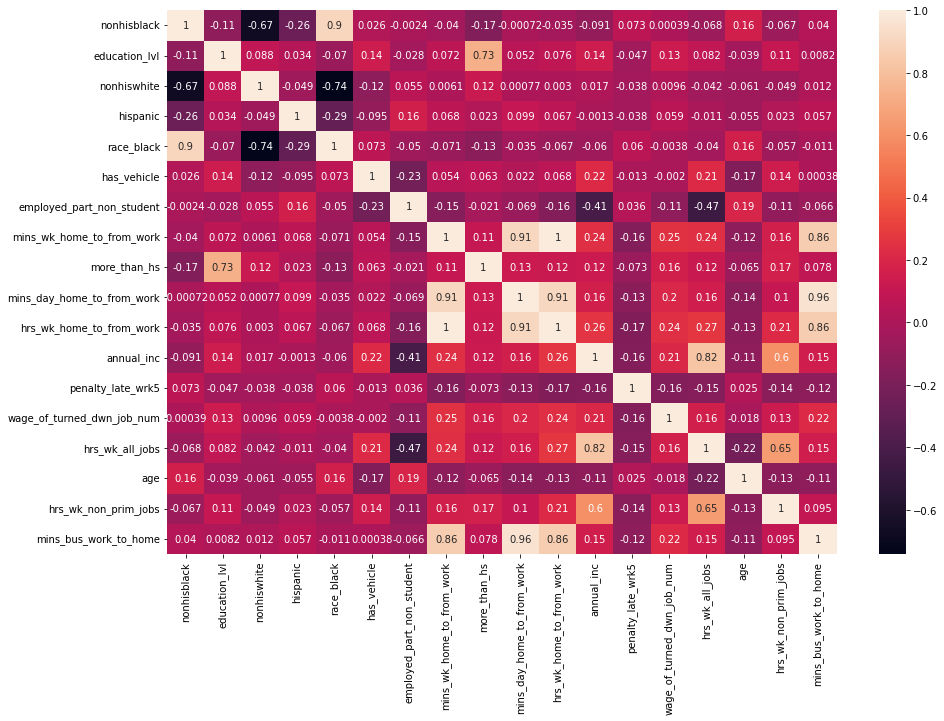

In [30]:
plt.figure(figsize=[15, 10])
plot_col = bus_riders[list(high_corr_columns(bus_riders))]
sns.heatmap(data=plot_col.corr(), annot=True);

In [31]:
column_ref = []
for col in bus_riders.columns:
    num_unique = bus_riders[col].nunique()
    if num_unique > 5:
        column_ref.append(col)
    
column_ref

['recordid',
 'wage_primary_job',
 'hrs_wk_prim_job',
 'hrs_wk_all_jobs',
 'avg_wage_other_jobs',
 'mins_last_stop_to_work',
 'mins_bus_home_to_work',
 'mins_bus_work_to_home',
 'hrs_wk_on_bus_to_work',
 'with_car_mins_to_work',
 'cost_of_taxi_to_wrk',
 'wage_of_turned_dwn_job',
 'time_find_new_job',
 'wage_old_vs_new_job',
 'wage_new_vs_old_job',
 'prmote_pay_wage',
 'satisfied_bus_predict',
 'birth_year',
 'age',
 'zip_code',
 'people_in_hh',
 'mins_to_get_to_bus_stop',
 'bus_time_get_to_doctor',
 'vehicle_time_to_doctor',
 'bus_system_finane_goals',
 'wage_of_turned_dwn_job_num',
 'years_used_pub_tran_corr',
 'days_a_wk_ride_bus_to_wrk',
 'education_lvl',
 'hrs_wk_non_prim_jobs',
 'annual_inc',
 'mins_day_home_to_from_work',
 'mins_wk_home_to_from_work',
 'hrs_wk_home_to_from_work']

In [32]:
summ_riders = bus_riders[column_ref[1:]]
summ_riders.head()

,wage_primary_job,hrs_wk_prim_job,hrs_wk_all_jobs,avg_wage_other_jobs,mins_last_stop_to_work,mins_bus_home_to_work,mins_bus_work_to_home,hrs_wk_on_bus_to_work,with_car_mins_to_work,cost_of_taxi_to_wrk,wage_of_turned_dwn_job,time_find_new_job,wage_old_vs_new_job,wage_new_vs_old_job,prmote_pay_wage,satisfied_bus_predict,birth_year,age,zip_code,people_in_hh,mins_to_get_to_bus_stop,bus_time_get_to_doctor,vehicle_time_to_doctor,bus_system_finane_goals,wage_of_turned_dwn_job_num,years_used_pub_tran_corr,days_a_wk_ride_bus_to_wrk,education_lvl,hrs_wk_non_prim_jobs,annual_inc,mins_day_home_to_from_work,mins_wk_home_to_from_work,hrs_wk_home_to_from_work
0,12.0,40,50,10.0,10,60,90,6,15,6.0,15,NaN,NaN,NaN,NaN,6,1966,52,27106,4,10,NaN,NaN,10,15.0,15,6,7,10,30160.0,150,900,15.000000
1,9.0,33,33,NaN,5,90,90,6,20,17.0,13,180.0,8.5,9.0,10.5,5,1995,23,27105,2,5,30.0,10.0,1,13.0,5,7,6,0,15444.0,180,1260,21.000000
2,8.0,39,39,NaN,10,90,5,10,2,10.0,9.5,NaN,NaN,NaN,NaN,7,1986,32,27105,4,10,NaN,NaN,6,9.5,3,5,7,0,16224.0,95,475,7.916667
3,9.0,8,8,NaN,5,15,15,7,5,4.5,11,NaN,NaN,NaN,NaN,5,1961,57,27101,2,15,30.0,15.0,7,11.0,57,7,6,0,3744.0,30,210,3.500000
4,10.5,35,35,NaN,15,60,60,6,15,12.0,NaN,NaN,NaN,NaN,NaN,7,1968,50,27105,8,3,NaN,NaN,10,0.0,5,5,5,0,19110.0,120,600,10.000000


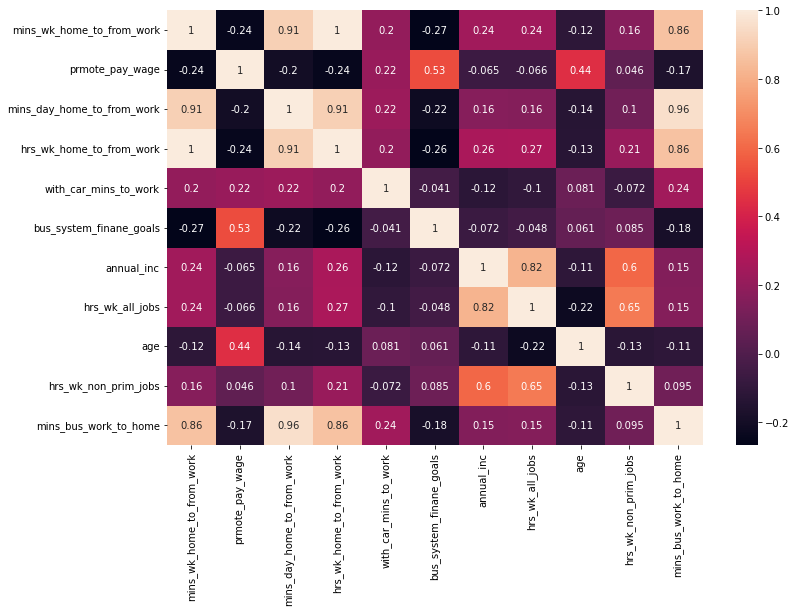

In [33]:
plt.figure(figsize=[12, 8])
plot_col = bus_riders[list(high_corr_columns(summ_riders, proportion=0.5))]
sns.heatmap(data=plot_col.corr(), annot=True);
save_plot('bus_riders_corr_matrix')


In [34]:
bus_riders['people_in_hh'].value_counts()

1    70
2    59
3    42
4    23
5    10
6     6
8     2
7     2
9     1
Name: people_in_hh, dtype: int64

## Visualization of Features with High Correlation

In [35]:
def reg_plot(data, x, y, xlabel, ylabel, title):
    """
    Create basic seaborn regression plot.
    
    Parameters
    ----------
    data : DataFrame
        Pandas dataframe contain data for the regression plot.
    x : str
        The column in the dataframe representing the x features.
    y : str
        The column in the dataframe representing the y fratures.
    xlabel : str
        Label for the x axis.
    ylabel : str
        Label for the y axis.
    title : str
        Title of the plot.
    """
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.right'] =True
    plt.figure(figsize=(8,5))
    sns.regplot(data=bus_riders, y=y, x=x, marker='.', color='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    

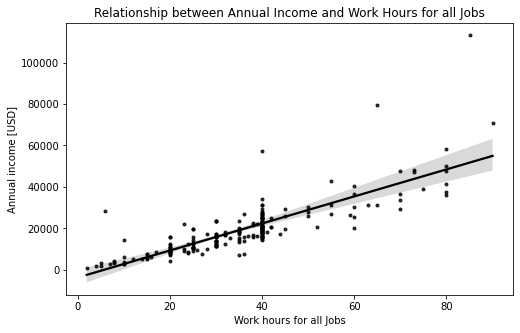

In [36]:
reg_plot(data=bus_riders, x='hrs_wk_all_jobs',
         y='annual_inc', xlabel='Work hours for all Jobs', 
         ylabel='Annual income [USD]', title='Relationship between Annual Income and Work Hours for all Jobs')
save_plot('bus_riders_annualincome_vs_workhours_alljobs')

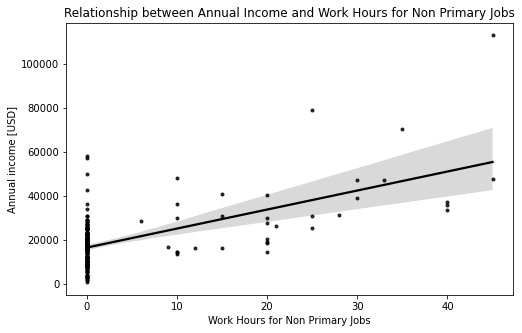

In [37]:
reg_plot(data=bus_riders, x='hrs_wk_non_prim_jobs',
         y='annual_inc', xlabel='Work Hours for Non Primary Jobs', 
         ylabel='Annual income [USD]', title='Relationship between Annual Income and Work Hours for Non Primary Jobs')
save_plot('bus_riders_annualincome_vs_workhour_primaryjob')

In [38]:
bus_riders['education_lvl'].unique()

array([ 7,  6,  5,  4,  3,  2,  9,  1,  8, 10], dtype=int64)

In [39]:
bus_riders['more_than_hs'].unique()

array([1, 0], dtype=int64)

In [76]:
def pie_plot(col_name, color=['#157fa1','#a4daeb']):
    plt.figure(figsize=[8,8])
    sort_count = bus_riders[col_name].value_counts()
    plt.pie(sort_count, labels=sort_count.index,autopct="%.1f%%", 
            pctdistance=0.77, startangle=90, 
            counterclock=False, wedgeprops={'width': 0.4},
           textprops={'fontsize': 12, 'family':'cursive','va':'baseline'}, colors=color);

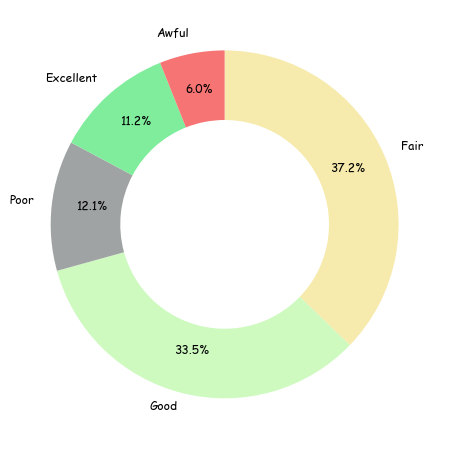

In [75]:
pie_plot('rate_pub_tran_system', color=['#f7eaad', '#cefac0', '#a0a3a3', '#80ed9d', '#f77474'])

In [113]:
cat_rate_trans= bus_riders['rate_pub_tran_system'].unique()
colors = ['#f7eaad', '#cefac0', '#a0a3a3', '#80ed9d', '#f77474']

In [114]:
cat_rate_trans

array(['Fair', 'Excellent', 'Poor', 'Good', 'Awful'], dtype=object)

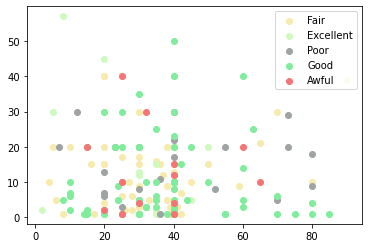

In [115]:
for cat_, col in zip(cat_rate_trans, colors):
    new_data = bus_riders.query("rate_pub_tran_system == @cat_")
    plt.scatter(data=new_data, x='hrs_wk_all_jobs', y='years_used_pub_tran_corr', color=col, label=cat_)
plt.legend();

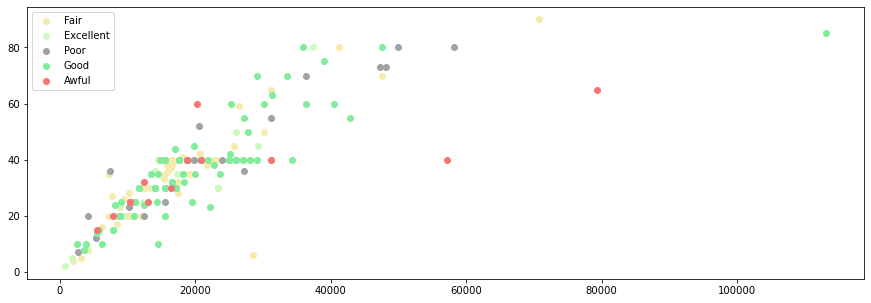

In [116]:
plt.figure(figsize=[15,5])
for cat_, col in zip(cat_rate_trans, colors):
    new_data = bus_riders.query("rate_pub_tran_system == @cat_")
    plt.scatter(data=new_data, y='hrs_wk_all_jobs', x='annual_inc', color=col, label=cat_)
plt.legend();

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


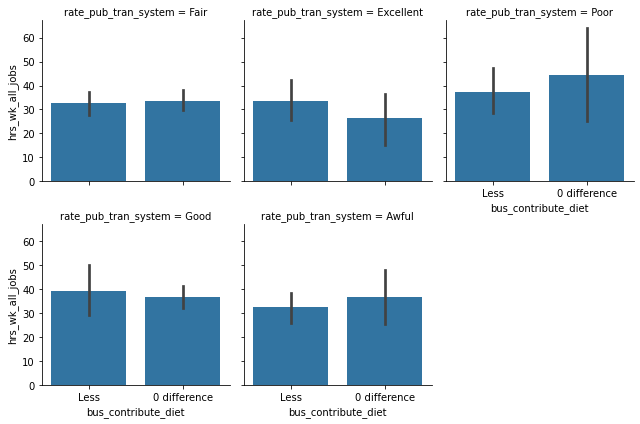

In [43]:
g = sns.FacetGrid(data=bus_riders, col='rate_pub_tran_system', col_wrap=3)
g.map(sns.barplot,'bus_contribute_diet',  'hrs_wk_all_jobs')

<AxesSubplot:xlabel='bus_contribute_diet', ylabel='hrs_wk_all_jobs'>

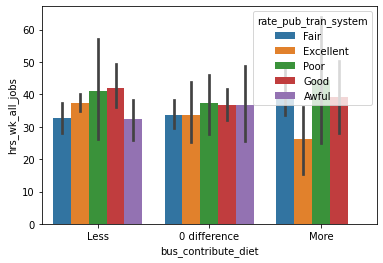

In [44]:
sns.barplot(data=bus_riders, x='bus_contribute_diet', y='hrs_wk_all_jobs', hue='rate_pub_tran_system')

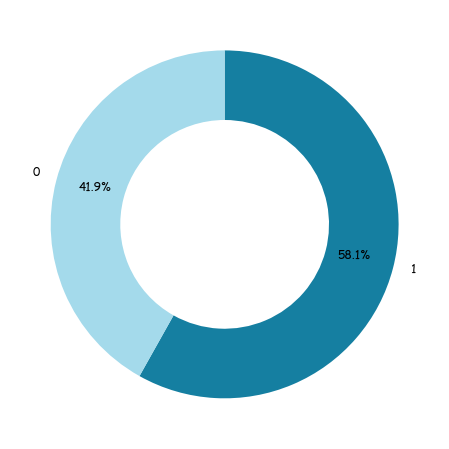

In [45]:
pie_plot('male')

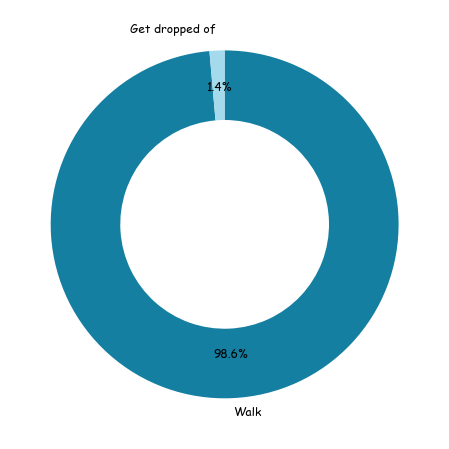

In [46]:
pie_plot('how_get_to_bus_stop')

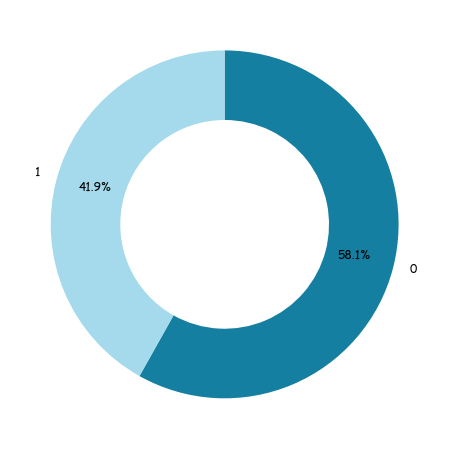

In [47]:
pie_plot('more_than_hs')

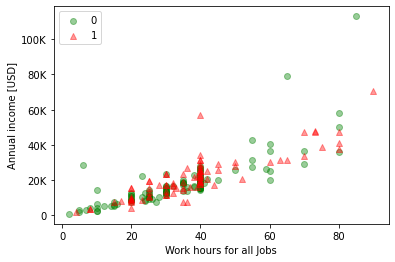

In [48]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = [0, 1]
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['more_than_hs'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='annual_inc', x='hrs_wk_all_jobs', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Work hours for all Jobs')
plt.ylabel('Annual income [USD]');

In [49]:
bus_riders['how_get_to_bus_stop'].unique()

array(['Walk', 'Get dropped of'], dtype=object)

In [50]:
bus_riders['bus_contribute_diet'].unique()

array(['Less', '0 difference', 'More'], dtype=object)

In [51]:
bus_riders['bus_grocer_more_fast_food'].unique()

array([0, 1], dtype=int64)

### Does High Annual income [USD] and High Work hours have an effect on Bus Riders Buying Fast Food?

It is expected that bus riders with higher income would buy more fast food than those who do not.

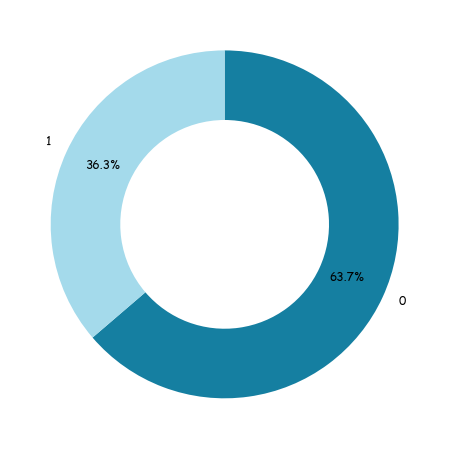

In [52]:
pie_plot('bus_grocer_more_fast_food')

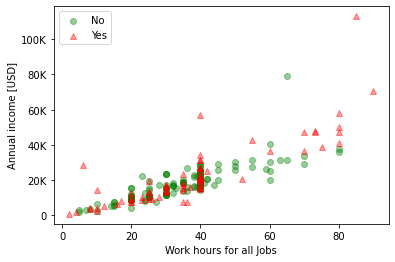

In [53]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_grocer_more_fast_food'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='annual_inc', x='hrs_wk_all_jobs', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Work hours for all Jobs')
plt.ylabel('Annual income [USD]');

From the plot we can see little difference between those who buy fast food and those who do not. But on further inspection, you can notice that bus riders who have more working hours and earn more took more fast food production than those with the same work hour. We can say that when riders with the same work hour earn more there are more likely to buy fast food.

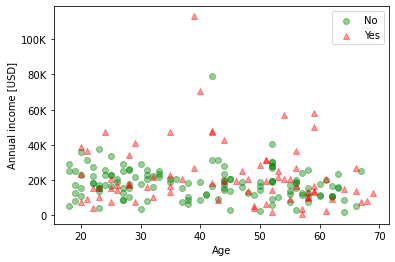

In [54]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_grocer_more_fast_food'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='annual_inc', x='age', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Age')
plt.ylabel('Annual income [USD]');

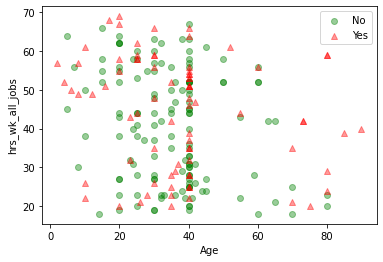

In [55]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_grocer_more_fast_food'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='age', x='hrs_wk_all_jobs', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
# plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Age')
plt.ylabel('hrs_wk_all_jobs');

### Indicator for whether riding the bus has resulted in rider buying more snack foods (chips, cookies, etc.) 

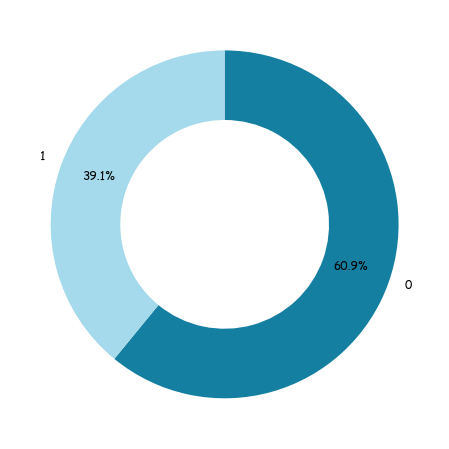

In [56]:
pie_plot('bus_grocer_more_snack_food')

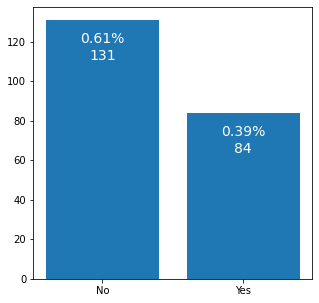

In [117]:
plt.figure(figsize=[5,5])
count_val = bus_riders['bus_grocer_more_snack_food'].value_counts()
plt.bar(count_val.index, count_val.values)
plt.xticks([0, 1], ['No', 'Yes'])
for i, val in enumerate(count_val):
    txt = "{:.2f}%\n{}".format(val/ count_val.sum(),val)
    plt.text(i,val-20, s=txt, color="white", ha='center', fontsize=14)
plt.yticks();

In [58]:
count_val

0    131
1     84
Name: bus_grocer_more_snack_food, dtype: int64

In [59]:
bus_riders['bus_grocer_more_snack_food'].unique()

array([0, 1], dtype=int64)

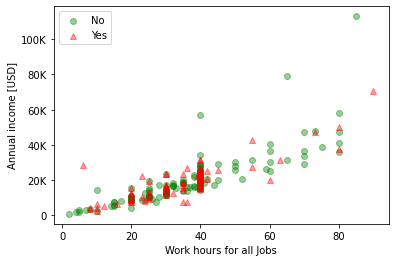

In [60]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_grocer_more_snack_food'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='annual_inc', x='hrs_wk_all_jobs', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Work hours for all Jobs')
plt.ylabel('Annual income [USD]');

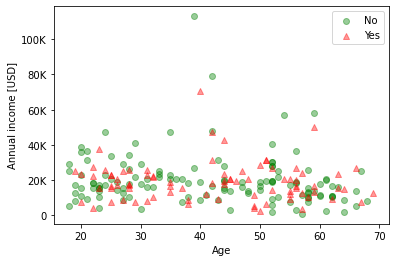

In [61]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_grocer_more_snack_food'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='annual_inc', x='age', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Age')
plt.ylabel('Annual income [USD]');

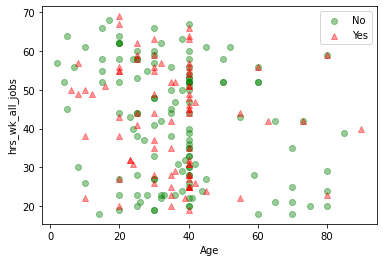

In [62]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_grocer_more_snack_food'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='age', x='hrs_wk_all_jobs', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
# plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Age')
plt.ylabel('hrs_wk_all_jobs');

### Indicator for whether riding the bus has resulted in rider buying fewer fruits and vegetables 

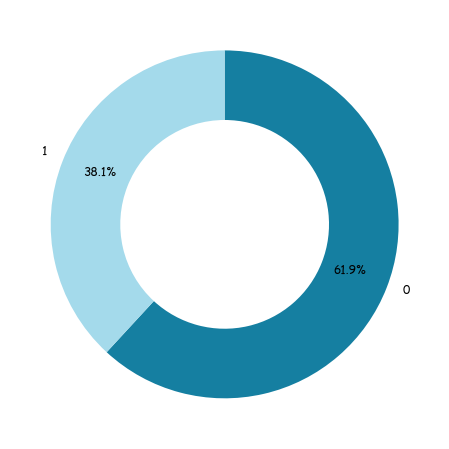

In [63]:
pie_plot('bus_grocer_less_fruit_veg')

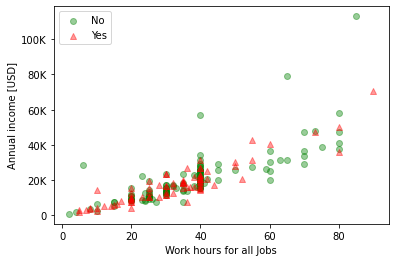

In [64]:
fast_food = [0, 1]# 0 meaning bus rider does not take fast_food and 1 meaning bus rider takes fast food.
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_grocer_less_fruit_veg'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='annual_inc', x='hrs_wk_all_jobs', color=color, marker=shape, alpha=0.4, label=label)
    plt.legend()
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Work hours for all Jobs')
plt.ylabel('Annual income [USD]');

### In general, does riding the bus contribute to you having you having a less healthy diet, or a more healthy diet , or no difference? 

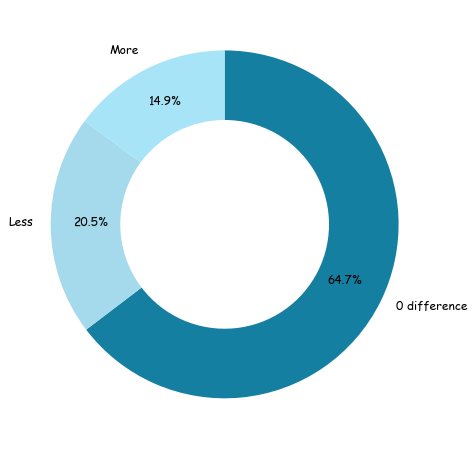

In [65]:
pie_plot('bus_contribute_diet', color=['#157fa1','#a4daeb', '#a8e4f7'])

In [66]:
bus_riders['bus_contribute_diet'].unique()

array(['Less', '0 difference', 'More'], dtype=object)

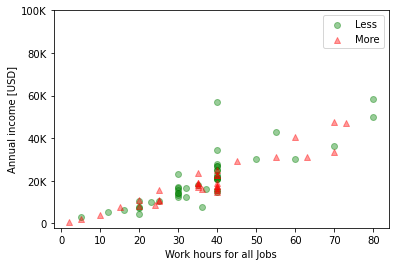

In [67]:
fast_food = ['Less', 'More']
color_ = ['green','red']
shape_ = ['o', '^']
label = ['No', 'Yes']
for answer, color, shape, label in zip(fast_food, color_, shape_, label):
    filt = bus_riders['bus_contribute_diet'] == answer
    new_frame = bus_riders[filt]
    plt.scatter(data=new_frame, y='annual_inc', x='hrs_wk_all_jobs', color=color, marker=shape, alpha=0.4, label=answer)
    plt.legend()
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.xlabel('Work hours for all Jobs')
plt.ylabel('Annual income [USD]');